# Trabalho 3

# Algoritmo de Karger

In [270]:
from auxx import *
import random as rd

In [271]:
def karger(vert : list, edges : list, vertex_dict : dict):
    
    choice = rd.choice(edges) #escolhe aresta aleatoria

    new_vert = max(vert)+1 #cria novo vertice
    vert.append(new_vert) #adiciona ao vertices

    # remove os vertices concatenado
    vert.remove(choice[0]) 
    vert.remove(choice[1])
    
    new_edges = [] #Criando uma lista de novas arestas
    vertex_dict[new_vert] = (choice) #criando um dicionario com a representação dos vertices


    for e in edges: #percorrendo cada vertice antigo
        if sorted(e) == sorted(choice): #não adiciona as arestas concatenadas
            continue

        #muda o valor dos antigos vertices para o novo vertice
        elif choice[0] == e[0] or choice[1] == e[0]:
            new_edges.append((new_vert,e[1]))

        elif choice[0] == e[1] or choice [1] == e[1]:
            new_edges.append((e[0], new_vert))

        #mantem as arrestas de outros vertices
        else:
            new_edges.append(e)
  
    
    #se não tiver somente 2 vertices, entra de forma recursiva
    if len(vert) != 2:
        vert, new_edges, vertex_dict = karger(vert, new_edges, vertex_dict)
    
    return vert, new_edges, vertex_dict


In [272]:
from graph import *

G = graph.from_a_file("graph_test")

In [273]:
len(G.list_)

7

In [274]:
def karger(vert : list, edges : list, vertex_dict : dict):
    
    choice = rd.choice(edges) #escolhe aresta aleatoria

    new_vert = max(vert)+1 #cria novo vertice
    vert.append(new_vert) #adiciona ao vertices

    # remove os vertices concatenado
    vert.remove(choice[0]) 
    vert.remove(choice[1])
    
    new_edges = [] #Criando uma lista de novas arestas
    vertex_dict[new_vert] = (choice) #criando um dicionario com a representação dos vertices

    #remove as arestas que ligam o novo vertice aos outros vertices
    for e in edges:
        if e[0] == new_vert or e[1] == new_vert:
            new_edges.remove(e)

    for e in edges:
        if sorted(e) == sorted(choice): #não adiciona as arestas concatenadas
            continue

        #muda o valor dos antigos vertices para o novo vertice
        elif choice[0] == e[0] or choice[1] == e[0]:
            new_edges.append((new_vert,e[1]))

        elif choice[0] == e[1] or choice [1] == e[1]:
            new_edges.append((e[0], new_vert))

        #mantem as arrestas de outros vertices
        else:
            new_edges.append(e)
  
    
    #se não tiver somente 2 vertices, entra de forma recursiva
    if len(vert) != 2:
        vert, new_edges, vertex_dict = karger(vert, new_edges, vertex_dict)
    
    return vert, new_edges, vertex_dict


In [275]:
vert, new_edges, vertex_dict = karger(list(range(G.vec_num)), G.edges_list, {})

In [276]:
len(new_edges)

6

In [277]:
new_edges

[(11, 5), (11, 5), (5, 11), (5, 11), (5, 11), (11, 5)]

$$(1 - \frac {2}{n^2 - n} )^N$$

n = numero de vertices <br>
N = numero de execuções

In [278]:
N = 0
P = 1
slice_ = []
result_karger = {}
result_P = []
while(P > 0.1):
    N += 1
    P = pow((1 - (2/ (pow(G.vec_num, 2) - G.vec_num))), N)
    
    vert, new_edges, vertex_dict = karger(list(range(G.vec_num)), G.edges_list, {})
    slice_.append(len(new_edges))
    result_karger[slice_[-1]] = (vert, vertex_dict)

    result_P.append(P)

In [279]:
def descompact(tuple_):
    vert, vertex_dict = tuple_
    blue_list = []
    red_list = []

    blue_list.append(vert[0])
    red_list.append(vert[1])

    print(blue_list)

    aux = []

    while(len(vertex_dict.keys())):
        print(len(vertex_dict.keys()))
        print(vertex_dict.keys())

        for v in blue_list:
            if v not in vertex_dict.keys():
                print(v, "eita blue")
                break

            blue_list.append(vertex_dict[v][0])
            blue_list.append(vertex_dict[v][1])
            blue_list.remove(v)
            del vertex_dict[v]
            print(vertex_dict[v])
        

        for v in red_list:
            if v not in vertex_dict.keys():
                print(v, "eita red")
                print(vertex_dict[v])
                break

            red_list.append(vertex_dict[v][0])
            red_list.append(vertex_dict[v][1])
            red_list.remove(v)
            del vertex_dict[v]
        
    
    return red_list, blue_list

In [280]:
import matplotlib.pyplot as plt

In [281]:
min(result_karger)

4

Text(0, 0.5, 'Probabilidade de não melhor')

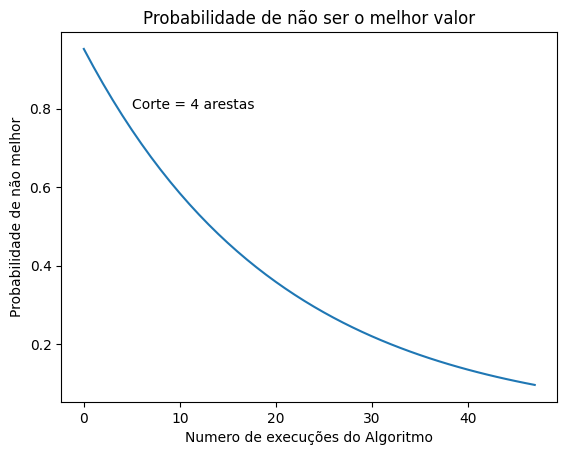

In [282]:
plt.plot(list(range(len(result_P))), result_P)
plt.title("Probabilidade de não ser o melhor valor")
plt.text(5, .8, f"Corte = {min(slice_)} arestas")

plt.xlabel('Numero de execuções do Algoritmo')
plt.ylabel('Probabilidade de não melhor')

In [283]:
min(result_karger)

4